In [125]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.append("../../")
import helpers

from pathlib import Path
from importlib import reload
reload(helpers)

sys.path.append("../../../gempy")
import gempy as gp
from gempy.assets import topology as tp

import os

geo_model, edges_init, centroids_init = helpers.prepare_geomodel(resolution=(60,50,60))
edges_init, centroids_init = tp.clean_unconformity_topology(geo_model, 1, edges_init, centroids_init)

../../../gempy\gempy\core\data.py:1737: UserWarning: If pole_vector and orientation are passed pole_vector is used/
  warnings.warn('If pole_vector and orientation are passed pole_vector is used/')


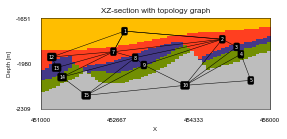

In [146]:
sys.path.append("../../../toolbox")
from toolbox import plot as ph
import matplotlib.colors as mcolors

lb = geo_model.solutions.lith_block.reshape(geo_model.grid.regular_grid.resolution)
colors =['#ffbe00', '#527682', '#527682', '#ff3f20', '#443988', '#728f02', '#bdbdbd']


cmap = mcolors.ListedColormap(colors)
loc = 36
font_size = 6
extent = list(geo_model.grid.regular_grid.extent)
linewidth = 0.5

label_kwargs = dict(
    size=5
)

edge_kwargs = dict(
    linewidth=linewidth
)

with plt.rc_context(ph.get_rcparams(font_size)):
    fig, ax = plt.subplots(figsize=ph.get_figsize(0.59, textwidth=503.61377, ratio=(5**.5 - 1) / 2))

    ax.imshow(
        lb[:, loc, :].T, origin="lower", cmap=cmap, interpolation="nearest", extent=extent[:2]+extent[4:]
    )
    gp.plot.plot_topology(
        geo_model, edges_init, centroids_init, scale=True, label_kwargs=label_kwargs, edge_kwargs=edge_kwargs
    )
    
    for axis in ['top', 'bottom', 'left', 'right']:
        ax.spines[axis].set_linewidth(linewidth)
        
    ax.set_yticks(np.linspace(extent[4], extent[5], 3))
    ax.set_yticklabels(np.linspace(extent[4] / 3, extent[5] / 3, 3).astype(int))
    ax.set_xticks(np.linspace(extent[0], extent[1], 4))
    
    ax.set_xlabel("X")
    ax.set_ylabel("Depth [m]")
    
    ax.set_title(f"XZ-section with topology graph", fontsize=font_size+2)
    
    plt.savefig("../../paper/figures/exp3_topo_section.pdf", bbox_inches='tight', dpi=400)